In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold, cross_val_score
from graphviz import Source
import matplotlib.pyplot as plt

In [0]:
datasets_path = "/content/drive/My Drive/Curso ML/ML/datasets"

In [0]:
dataset_path = os.path.join(datasets_path, "iris/iris.csv")

In [5]:
data = pd.read_csv(dataset_path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

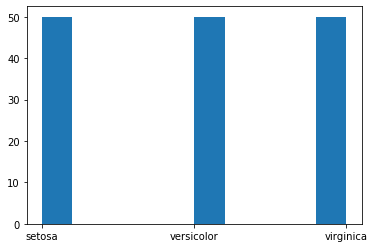

In [6]:
plt.hist(data.Species)

In [7]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
colnames = data.columns.to_list()
predictors = colnames[:4]
target = colnames[4]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data[predictors],data[target], train_size=0.75)

In [10]:
print( "Train: " + str(X_train.shape[0]) + ", Test: " +  str(X_test.shape[0]))

Train: 112, Test: 38


In [11]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [0]:
preds = tree.predict(X_test)

In [13]:
pd.crosstab(Y_test, preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,18,0,0
versicolor,0,9,2
virginica,0,1,8


## Visualización del árbol de decisión




In [0]:
path_dot = "/content/drive/My Drive/Curso ML/ML/resources/iris_dtree.dot"
with open(path_dot, "w") as dotFile:
  export_graphviz(tree, out_file=dotFile, feature_names=predictors)
  dotFile.close()


In [15]:
file = open(path_dot, 'r')
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.577\\nsamples = 112\\nvalue = [32, 39, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 32\\nvalue = [32, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 80\\nvalue = [0, 39, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.446\\nsamples = 43\\nvalue = [0, 39, 4]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 4.95\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 38, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 38\\nvalue = [0, 38, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 0, 37]"] ;\n2 -> 8 ;\n}'

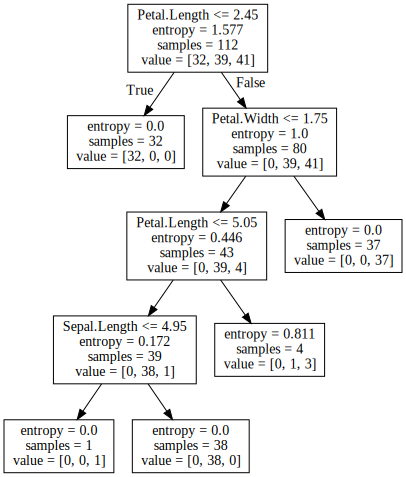

In [16]:
Source(text)

## Cross validation para la poda


In [0]:
X =data[predictors]
Y = data[target]

In [18]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [0]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [0]:
score =  np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1))

In [21]:
score

0.9333333333333333

## Random forest


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=10)
forest.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [24]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [25]:
forest.oob_score_

0.9466666666666667